# Homework 1 (HW1)

By the end of this homework, we expect you to be able to:

- Load data and handle data using pandas;
- Navigate the documentation of Python packages by yourself;
- Filter and tidy up noisy real-world datasets;
- Aggregate your data in different (and hopefully helpful) ways; 
- Create meaningful visualizations to analyze the data;

---

## Important Dates

- Homework release: Fri 14 Oct 2022
- **Homework due**: Sat 29 Oct 2022, 23:59
- Grade release: Mon 07 Nov 2022

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, 
you may do so, but must justify your choice.
2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you 
don’t change any of the files.)
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you 
implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation
 (**in markdown**).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a 
single notebook (plus the required data files) in the *master/main* branch. If there are multiple notebooks present, 
we will **not grade** anything.
7. We will **not run your notebook for you**! Rather, we will grade it as is, which means that only the results 
contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. 
Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended,
 you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. In continuation to the previous point, interactive plots, such as those generated using `plotly`, should be 
**strictly avoided**!
9. Make sure to print results or dataframes that confirm you have properly addressed the task.

---

In this homework, we will analyze data from A/B tests of headlines conducted by Upworthy from January 2013 to April 2015 to study whether the language used in the headline determines the number of people that will read the associated news piece. The homework contains four tasks: in task 1, we will process the data; in task 2, we will extract meaningful signals from the data; in task 3, we will test whether the language of headlines impacts their success; and in task 4, we will explore the heterogeneity of this effects (e.g., does it vary through time?).


### **What is an A/B test?** 
A/B tests are experiments that compare two scenarios (e.g., scenario A vs. scenario B). 
They test subjects' responses to each of the variants to determine which is more effective ([read more about A/B tests on Wikipedia](https://en.wikipedia.org/wiki/A/B_testing)). 
A/B tests allow us to draw conclusions about the different scenarios by randomizing exposure to them, e.g., one could flip a coin and assign a user to scenario A if it lands heads and to B if it lands tails. 
Since exposure is randomized, we can be confident that the scenarios are the sole explanation for statistically significant differences in subjects' responses (if they exist). 
In theory, A/B testing refers to an experiment that compares two scenarios; however, in practice, the term is also used when we compare multiple scenarios (e.g., A vs. B vs. C), although the more precise terminology would be to call such an experiment a "multinomial test."

### **How were A/B tests used by Upworthy?** 
Upworthy used A/B testing to increase news readership, conducting experiments for each published news piece. 
In each experiment, they created multiple "packages" of stimuli, varying headlines, images, excerpts, and ledes for the same news piece. 
Different "packages" were shown on their (now defunct) website to engage users with the news pieces they produced. Upworthy found "the best" package by conducting A/B tests, showing different packages to different users, and measuring how often users clicked on each version. 
Below, we show three "packages" used by Upworthy in an experiment, each with a different headline for the same news piece. 
Upworthy randomized users that visited their website saw one of the three versions of the headline below. Then, they measured the percentage of times users in each scenario clicked to read the news. 
The headline with the highest percentage of clicks per view (click through rate) was then declared the "winner" and became the default for all visitors.

![Example A/B test](example.png)

 ### **Where does this data come from?** 
 
 From a paper [1].

[1] Matias, J.N., Munger, K., Le Quere, M.A. et al. The Upworthy Research Archive, a time series of 32,487 experiments in U.S. media. Sci Data 8, 195 (2021). https://doi.org/10.1038/s41597-021-00934-7

### **Where can I find this data?**  

You can find it in the `/data/` folder.

### **Terminology**

- **News piece:** A news article. In the dataset considered, these were all produced by Upworthy.
- **Package:** The set of visual stimuli inviting the user to read an article. The figure above shows a package with a headline and an image. At times, there was an excerpt of the article also shown in the package and/or the lede, i.e., ["the introductory section of a news story that is intended to entice the reader to read the full story."](https://www.merriam-webster.com/words-at-play/bury-the-lede-versus-lead#:~:text=In%20journalism%2C%20the%20lede%20refers,machines%20began%20disappearing%20from%20newsrooms.)
- **Experiment:** Each experiment is an A/B test (or multinomial test, to be more precise) comparing how users reacted to different "packages." Experiments measured two things: 1) how many users were shown each package; and 2) how many individuals clicked each package.

### **Data description**

| Column name          | Description                                                                                                                                                                                       |   |   |   |
|----------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---|---|---|
| created_at           | Time the package was created (timezone unknown)                                                                                                                                                   |   |   |   |
| test_week            | Week the package was created, a variable constructed by the archive creators for stratified random sampling                                                                                       |   |   |   |
| clickability_test_id | The test ID. Viewers were randomly assigned to packages with the same test ID                                                                                                                     |   |   |   |
| impressions          | The number of viewers who were assigned to this package. The total number of participants for a given test is the sum of impressions for all packages that share the same clickability_test_id    |   |   |   |
| headline             | The headline being tested                                                                                                                                                                         |   |   |   |
| eyecatcher_id        | Image ID. Image files are not available. Packages that shared the same image have the same eyecatcher_id                                                                                          |   |   |   |
| clicks               | The number of viewers (impressions) that clicked on the package. The clickrate for a given package is the number of clicks divided by the number of impressions                                   |   |   |   |
| excerpt              | Article excerpt                                                                                                                                                                                   |   |   |   |
| lede                 | The opening sentence or paragraph of the story                                                                                                                                                    |   |   |   |
| slug                 | Internal name for the web address                                                                                                                                                                 |   |   |   |
| share_text           | Summary for display on social media when the article is shared. This was not shown in tests, since tests were conducted on the Upworthy website                                                   |   |   |   |
| square               | When used, part of the same social media sharing suggestion as the share text                                                                                                                     |   |   |   |
| significance         | NOT an estimate of statistical significance; a complex, inconsistent calculation that compared the clicks on a package to the clicks on all previous packages that were fielded on the same pages |   |   |   |
| first_place          | Along with significance, shown to editors to guide decisions about what test to choose                                                                                                            |   |   |   |
| winner               | Whether a package was selected by editors to be used on the Upworthy site after the test                                                                                                          |   |   |   |
| updated_at           | The last time the package was updated in the Upworthy system                                                                                                                                      |   |   |   |


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# desactivate warnings
import warnings
warnings.filterwarnings('ignore')

## Task 1: Getting familiar with the data

Your first task is to conduct initial analyses to understand the data and process it in a way that will allow us to more easily answer our key question: *how does the language of a headline determine its success?*

1.1 Load the data into memory using pandas and print the first lines to get a sense of it.

1.2 Each experiment comparing different versions of the same news piece ("packages") has a unique identifier (`clickability_test_id` column). 
Calculate how many different experiments were conducted in this dataset and, on average, how many packages were considered per experiment. 
Last, plot the distribution of packages per experiment with a visualization of your choice.

1.3 A common way to measure success in online A/B tests is what is called "the clickthrough rate."
Given that often A/B tests are created to find what engages users (here, "packages" of headlines, images, etc), we would expect that a "good" package makes people click often. 
Create a column named `ctr` by dividing the number of clicks a package received (`clicks` column) by the number of impressions it received (`impressions` column).

1.4 Packages varied any combination of the headline (`headline` column), the excerpt (`excerpt`), the first sentence of the article (`lede`), and the image that illustrates the news piece (`eyecatcher_id`, a hash per image). 
But we want to isolate the effect of the headline on the clickthrough rate. To do that, create a new dataframe where you filter all experiments where only one headline is present. 
Print the length of this new dataframe and how many experiments were discarded in the filtering process.

1.5 For comparison, repeat the procedure described in **T1.4** with the `eyecatcher_id` column, i.e., create a dataframe considering only experiments that vary the image. 
Again, print the length of this new dataframe and how many experiments were discarded in the filtering process.

1.6 **Discuss:** Considering the answers to questions **T1.4** and **T1.4**, what can we say about the different versions of the news tested by Upworthy?

1.7 For our subsequent analysis, we want to compare the causal effect of headlines on the success of a news piece. 
For that, we can compare pairs of packages with the same `eyecatcher_id`, `lede`, and `excerpt`, but different `headlines`.
Note that this means that if an experiment considered 5 different headlines and did not vary any other stimulus, we would have 5C2 (i.e., 5 choose 2, 10) pairs to consider.
Create a dataset where:
- each row corresponds to a pair of packages with different `headline` but the same `eyecatcher_id`, `lede`, and `excerpt`. 
- there are columns containing the headlines of each of the news versions (`headline1`, `headline2`) and the clickthrough rate of each of the news versions (`ctr1`, `ctr2`). 
- the columns `headline1` and `ctr1` contain the data associated with the news version with the highest clickthrough rate. Print the first columns of your newly created dataframe, as well as its length.
-  the columns where the two news pieces had exactly the same clickthrough rate should be filtered out (this is for simplicity's sake).
-  the column `date_created` contains the date when the news version with the highest clickthrough rate was created.

1.8 To get a sense of the impact of headline change, measure the average difference per pair between the most clicked-through (`ctr1`) and the least clicked-through headline (`ctr2`), as well as the average clickthrough rate for the least clicked through headline (`ctr2`). 

1.9 **Discuss:** Considering your answer to **T1.8**, and assuming the average differences in clickthrough rates between pairs are statistically significant, do you think that headlines are impactful in the news business? Justify with the data.

### T1.1

1.1 Load the data into memory using pandas and print the first lines to get a sense of it.

In [ ]:
# # unzip the upworthy.gz file
# import gzip
# with gzip.open('data/upworthy.csv.gz', 'rb') as f:
#     file_content = f.read()

# # write the file content to a new file
# with open('data/upworthy.csv', 'wb') as f:
#     f.write(file_content)

In [ ]:
# read the csv file into a pandas dataframe
df = pd.read_csv('data/upworthy.csv')
# print the first 5 rows of the dataframe
df.head()

,created_at,updated_at,clickability_test_id,excerpt,headline,lede,slug,eyecatcher_id,impressions,clicks,significance,first_place,winner,share_text,square,test_week
0,2014-11-20 06:43:16.005,2016-04-02 16:33:38.062,546d88fb84ad38b2ce000024,Things that matter. Pass 'em on.,They're Being Called 'Walmart's Worst Nightmar...,"<p>When I saw *why* people are calling them ""W...",theyre-being-called-walmarts-worst-nightmare-a...,546d6fa19ad54eec8d00002d,3052,150,100.0,True,True,Anyone who's ever felt guilty about shopping a...,NaN,201446
1,2014-11-20 06:54:36.335,2016-04-02 16:25:54.027,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546bc55335992b86c8000043,3526,90,4.1,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446
2,2014-11-20 06:54:57.878,2016-04-02 16:31:45.671,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714cd2dd00002e,3506,120,100.0,True,False,"If you ever wondered, ""but what about the men?...",NaN,201446
3,2014-11-20 06:55:07.212,2016-04-02 16:25:54.029,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714c6c44000038,3380,98,25.3,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446
4,2014-11-20 06:55:20.347,2016-04-02 16:25:54.032,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714c1ad900001e,3465,75,0.2,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446


### T1.2

1.2 Each experiment comparing different versions of the same news piece ("packages") has a unique identifier (`clickability_test_id` column). 
Calculate how many different experiments were conducted in this dataset and, on average, how many packages were considered per experiment. 
Last, plot the distribution of packages per experiment with a visualization of your choice.

Number of experiments conducted :  4822
Average number of packages per experiment: 4.27 




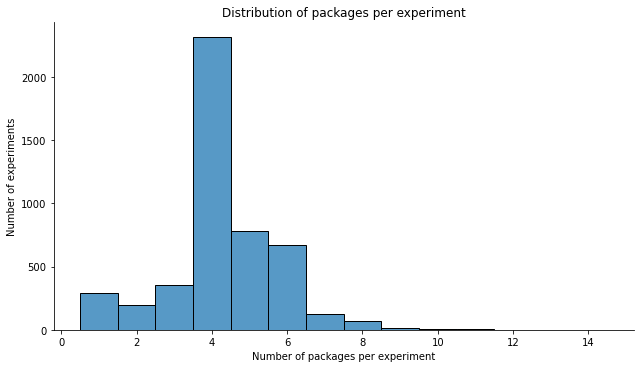

In [ ]:
# Each experiment comparing different versions of the same news piece ("packages") has a unique identifier (`clickability_test_id` column). 
# Calculate how many different experiments were conducted in this dataset and print the result.
numberExperiments = df['clickability_test_id'].nunique()
print("Number of experiments conducted : ", numberExperiments)
# calculate on average, how many packages were considered per experiment.
print("Average number of packages per experiment: %.2f \n\n" % df['clickability_test_id'].value_counts().mean())

# plot the distribution of packages per experiment
experiments = df.groupby(['clickability_test_id']).agg(['count'])
plot = sns.displot(experiments['created_at'], x='count', discrete=True, height = 5, aspect = 1.8)   #un peut crados le ['created_at']
plot = plot.set(title = "Distribution of packages per experiment",
                xlabel='Number of packages per experiment',
                ylabel='Number of experiments')

#TODO: use log = True ???


In [ ]:
# # Each experiment comparing different versions of the same news piece ("packages") has a unique identifier (`clickability_test_id` column). 
# # Calculate how many different experiments were conducted in this dataset and print the result.
# print("Number of experiments conducted: ", df['clickability_test_id'].nunique())
# # calculate on average, how many packages were considered per experiment.
# print("Average number of packages per experiment: ", df['clickability_test_id'].value_counts().mean())
# # get the maximum and minimum number of packages considered in an experiment
# max_num_per_exp = df['clickability_test_id'].value_counts().max()
# min_num_per_exp = df['clickability_test_id'].value_counts().min()
# # plot the distribution of packages per experiment in a smoothed histogram
# data_to_plot = df['clickability_test_id'].value_counts().plot.kde(
#     title = 'Distribution of packages per experiment', figsize = (15, 7),
#     xlabel = 'Number of packages per experiment', ylabel = 'Density',
#     xlim = (min_num_per_exp-1, max_num_per_exp), ylim = (0,1), bw_method = 0.15)


### T1.3

1.3 A common way to measure success in online A/B tests is what is called "the clickthrough rate."
Given that often A/B tests are created to find what engages users (here, "packages" of headlines, images, etc), we would expect that a "good" package makes people click often. 
Create a column named `ctr` by dividing the number of clicks a package received (`clicks` column) by the number of impressions it received (`impressions` column).

In [ ]:
# Create a column named 'ctr' by dividing the number of clicks a package received ('clicks' column) by the number of impressions it received ('impressions' column).
df['ctr'] = df['clicks'] / df['impressions']

df.sample(3)   #checking the results

,created_at,updated_at,clickability_test_id,excerpt,headline,lede,slug,eyecatcher_id,impressions,clicks,significance,first_place,winner,share_text,square,test_week,ctr
8731,2013-09-11 23:35:09.795,2016-04-02 16:27:37.849,5230fd615647a36146000b95,It's all fun and games until someone loses acc...,"What Provides 250,000 Jobs And Is Literally Di...",<p>\n\t The first couple times I wa...,what-provides-250-000-jobs-and-is-literally-di...,5332bfc71fae79f09f00bafe,6855,69,37.9,False,False,NaN,Thumbnail1.jpg,201336,0.010066
11273,2014-01-16 15:48:41.421,2016-04-02 16:28:40.069,52d7ff070283f31542001e5d,This makes me want to dance or make a giant me...,We Can't All Be Extroverts. Just Ask This Intr...,<p>Introverted Glee cast member and dancing ma...,we-cant-all-be-extroverts-just-ask-this-introv...,5332fd50a2fc90ead0002b16,2834,59,1.3,False,False,NaN,harry11-2-db017b0cbb3923c7899b7dc138ccbbf8.jpg,201402,0.020819
9383,2013-10-17 00:31:51.82,2016-04-02 16:27:53.421,525f2560f9c23fb2f80001fb,Things that matter. Pass 'em on.,Some Geeks Were Mad At The Idea – So I Hope Th...,<p>\n\t Donald Glover is an incre...,some-geeks-were-mad-at-the-idea-so-i-hope-they...,5332c0e91fae79f09f00d9ae,6086,92,0.0,False,False,NaN,Screen_Shot_2013-10-17_at_12.58.41_AM.png,201341,0.015117


### T1.4

1.4 Packages varied any combination of the headline (`headline` column), the excerpt (`excerpt`), the first sentence of the article (`lede`), and the image that illustrates the news piece (`eyecatcher_id`, a hash per image). 
But we want to isolate the effect of the headline on the clickthrough rate. To do that, create a new dataframe where you filter all experiments where only one headline is present. 
Print the length of this new dataframe and how many experiments were discarded in the filtering process.

In [ ]:
# New dataframe where we filter all experiments where only one headline is present
expDiffHeadlines = df.groupby('clickability_test_id').filter(lambda x: x['headline'].nunique() > 1)

# Get the number of experiments in the new dataframe
numExpDiffHeadlines = expDiffHeadlines['clickability_test_id'].nunique()

# Print the length of this new dataframe and how many experiments were discarded in the filtering process.
print("Number of experiments with only one headline: ", numExpDiffHeadlines)
print("Number of experiments discarded: ", numberExperiments-numExpDiffHeadlines)

Number of experiments with only one headline:  2586
Number of experiments discarded:  2236


In [ ]:
# # new dataframe where we filter all experiments where only one headline is present
# more_than_one_headline_df = df.groupby('clickability_test_id').filter(lambda x: len(x['headline'].unique()) > 1)
# # Print the length of this new dataframe and how many experiments were discarded in the filtering process.
# print("Number of experiments with more than one headline: ", more_than_one_headline_df['clickability_test_id'].nunique())
# print("Number of experiments discarded: ", df['clickability_test_id'].nunique() - more_than_one_headline_df['clickability_test_id'].nunique())
# # show the resulting dataframe
# new_df = more_than_one_headline_df.reset_index(drop=True)
# new_df

### T1.5

For comparison, repeat the procedure described in **T1.4** with the `eyecatcher_id` column, i.e., create a dataframe considering only experiments that vary the image. 
Again, print the length of this new dataframe and how many experiments were discarded in the filtering process.

In [ ]:
# New dataframe where we filter all experiments where only one headline is present
expDiffImage = df.groupby('clickability_test_id').filter(lambda x: x['eyecatcher_id'].nunique() > 1)

# Get the number of experiments in the new dataframe
numExpDiffImage = expDiffImage['clickability_test_id'].nunique()

# Print the length of this new dataframe and how many experiments were discarded in the filtering process.
print("Number of experiments with only one headline: ", numExpDiffImage)
print("Number of experiments discarded: ", numberExperiments-numExpDiffImage)


Number of experiments with only one headline:  1714
Number of experiments discarded:  3108


In [ ]:
# # create a dataframe using only the experiments that vary the eyecatcher_id (experiments that have more than one eye catcher)
# more_than_one_eyecatcher_df = df.groupby('clickability_test_id').filter(lambda x: len(x['eyecatcher_id'].unique()) > 1)
# # print the number of experiments in this new dataframe
# print("Number of experiments with more than one eyecatcher: ", more_than_one_eyecatcher_df['clickability_test_id'].nunique())
# # print the number of experiments that were discarded in the filtering process
# print("Number of experiments discarded: ", df['clickability_test_id'].nunique() - more_than_one_eyecatcher_df['clickability_test_id'].nunique())

### T1.6 

1.6 **Discuss:** Considering the answers to questions **T1.5** and **T1.4**, what can we say about the different versions of the news tested by Upworthy?

**Answer:**  

### T1.7

For our subsequent analysis, we want to compare the causal effect of headlines on the success of a news piece. 
For that, we can compare pairs of packages with the same `eyecatcher_id`, `lede`, and `excerpt`, but different `headlines`.
Note that this means that if an experiment considered 5 different headlines and did not vary any other stimulus, we would have 5C2 (i.e., 5 choose 2, 10) pairs to consider.
Create a dataset where:
- each row corresponds to a pair of packages with different `headline` but the same `eyecatcher_id`, `lede`, and `excerpt`. 
- there are columns containing the headlines of each of the news versions (`headline1`, `headline2`) and the clickthrough rate of each of the news versions (`ctr1`, `ctr2`). 
- the columns `headline1` and `ctr1` contain the data associated with the news version with the highest clickthrough rate. Print the first columns of your newly created dataframe, as well as its length.
-  the columns where the two news pieces had exactly the same clickthrough rate should be filtered out (this is for simplicity's sake).
-  the column `date_created` contains the date when the news version with the highest clickthrough rate was created.

In [ ]:
# create a new dataframe with only the columns we need
new_df = df[['created_at', 'headline', 'eyecatcher_id', 'lede', 'excerpt', 'ctr']]
# group the dataframe by the columns we need to be the same, filter the groups where there's only one headline
new_df = new_df.groupby(['eyecatcher_id', 'lede', 'excerpt']).filter(lambda x: len(x['headline'].unique()) > 1)#.sort_values(by=['ctr'], ascending=False)

# sort the dataframe by the clickthrough rate
new_df = new_df.sort_values(by=['ctr'], ascending=False)

# make pairs of rows with the same eyecatcher_id, lede and excerpt and different headlines
new_df = pd.merge(new_df, new_df, on=['eyecatcher_id', 'lede', 'excerpt'], suffixes=('1', '2'))

#drop pairs of same headlines
new_df = new_df[new_df['headline1'] != new_df['headline2']]

# the columns headline1 and ctr1 should contain the data associated with the news version with the highest clickthrough rate so we should 
# interchange the headlines, ctrs and created_at dates if ctr2 is higher than ctr1
new_df.loc[new_df['ctr2'] > new_df['ctr1'], ['headline1', 'headline2', 'ctr1', 'ctr2', 'created_at1', 'created_at2']] = new_df.loc[new_df['ctr2'] > new_df['ctr1'], ['headline2', 'headline1', 'ctr2', 'ctr1', 'created_at2', 'created_at1']].values
new_df.describe()

# drop duplicates
new_df = new_df.drop_duplicates()

# create new column data_created that contains the date when the news version with the highest clickthrough rate was created
new_df['date_created'] = new_df['created_at1']
# drop the columns we don't need
new_df = new_df.drop(columns=['created_at1', 'created_at2'])

In [ ]:
new_df.sample(3)

,headline1,eyecatcher_id,lede,excerpt,ctr1,headline2,ctr2,date_created
36025,If You Saw It You'd Think It Was A UFO. Then Y...,544e61316fba940ef000001b,<p>We keep hearing about drones but do you eve...,Things that matter. Pass 'em on.,0.006067,"It Looks Like A UFO, But Here's A Flying Objec...",0.001782,2014-10-27 15:19:43.905
20416,A Donkey Or A Translator Who Helped Save Ameri...,544520f4ac84eaf54f000021,<p>The America I thought I lived in wouldn't l...,Things that matter. Pass 'em on.,0.009330,John Oliver Goes Off On The US Government For ...,0.008561,2014-10-20 14:56:35.747
16195,Her parents think being gay is against nature....,5522d108623833002cc80000,<p>Arati Warrier speaks passionately about how...,Arati Warrier speaks passionately about how he...,0.019183,"If this woman got engaged to her soulmate, her...",0.012882,2015-04-06 18:56:47.277


### T1.8

To get a sense of the impact of headline change, measure the average difference per pair between the most clicked-through (`ctr1`) and the least clicked-through headline (`ctr2`), as well as the average clickthrough rate for the least clicked through headline (`ctr2`).

In [ ]:
# compute the average difference between ctr1 and ctr2
averageDifference = (new_df['ctr1'] - new_df['ctr2']).mean()
print("Average difference between ctr1 and ctr2: ", averageDifference)

# Print the average of ctr2
print("Average value of ctr2: ", new_df['ctr2'].mean())

Average difference between ctr1 and ctr2:  0.004290763753095567
Average value of ctr2:  0.011068169678308237


In [ ]:
# # compute the average difference between ctr1 and ctr2
# new_df['ctr_diff'] = new_df['ctr1'] - new_df['ctr2']
# print("Average difference between ctr1 and ctr2: ", new_df['ctr_diff'].mean())
# # compute average ctr2 
# print("Average ctr2: ", new_df['ctr2'].mean())
# # compute the difference ratio in percentage
# print("Average difference ratio: ", new_df['ctr_diff'].mean() / new_df['ctr2'].mean() * 100, "%")


## Task 2: Extracting signals from the data

Your second task is to extract meaningful signals from the data. 
We start this task from the dataset obtained in **T1.7**. 
Recall that we have one A/B test per row with the clickthrough rate of two news pieces that differ only in their headline. 
We refer to the version with the higher clickthrough rate as the "winner" and the version with the lower as the "loser." 
(Note that this is not the same as the column `winner` in the original data, which captures a similar concept but considering the original experiments, where multiple comparisons were made!)
 
2.1 Using the function provided below, count the number of words in each headline, creating columns `numwords1` and `numwords2` corresponding to the number of words in the winner and loser headlines.

2.2 Using the dictionary of pronouns provided below, create indicator variables corresponding to each set of pronouns (e.g., first-person singular may yield columns `first_person_singular1` and `first_person_singular2` for the headlines in each A/B test). 
Each indicator variable in the dataframe should equal 1 if the corresponding headline uses the corresponding type of pronoun and 0 otherwise. 
Your code should be agnostic to lower/upper case.

2.3 One easy way to classify sentiment is simply to match negative or positive words. 
Use the linked lists of words ([positive][1], [negative][2]) to obtain "positive sentiment" and "negative sentiment" scores for each headline. Create columns `positive1`/`positive2` and `negative1`/`negative2` containing indicator variables for positive and negative sentiment, i.e., A headline has a "positive sentiment" (or negative) score equal 1 if it contains at least one positive (or negative) sentiment word on the list. Otherwise, its "positive sentiment" (or negative) score equals 0.
    
[1]: https://ptrckprry.com/course/ssd/data/positive-words.txt
[2]: https://ptrckprry.com/course/ssd/data/negative-words.txt

--- 

**Comments**

- For **T2.3**, beware of encodings!

### T2.1 

Using the function provided below, count the number of words in each headline, creating columns `numwords1` and `numwords2` corresponding to the number of words in the winner and loser headlines.

In [ ]:
# 2.1 (provided code)
def count_words_simple(x):
    return len(x.split(" "))
str_test = "How many words are here?"
print(str_test, count_words_simple(str_test))


How many words are here? 5


In [ ]:
# copy the dataframe obtained at the end of the previous task
task_2_df = new_df.copy()

In [ ]:
# using the function count_words_simple, create new columns numwords1 and numwords2 that contain the number of words in headline1 and headline2 respectively
task_2_df['numwords1'] = task_2_df['headline1'].apply(count_words_simple)
task_2_df['numwords2'] = task_2_df['headline2'].apply(count_words_simple)
# reorder the columns
task_2_df = task_2_df[['eyecatcher_id', 'lede', 'excerpt', 'headline1','ctr1', 'numwords1', 'headline2', 'ctr2', 'numwords2', 'date_created']]


In [ ]:
task_2_df

,eyecatcher_id,lede,excerpt,headline1,ctr1,numwords1,headline2,ctr2,numwords2,date_created
1,5332bcd71fae79f09f00746c,"<p>Back in the day, for those of you younger f...",A famous actor makes a frightening discovery a...,Dustin Hoffman Breaks Down Trying To Explain S...,0.136063,14,Dustin Hoffman Breaks Down Crying Trying To Ex...,0.127604,15,2013-07-08 21:20:09.751
2,5332bcd71fae79f09f00746c,"<p>Back in the day, for those of you younger f...",A famous actor makes a frightening discovery a...,Dustin Hoffman Breaks Down Trying To Explain S...,0.136063,14,Dustin Hoffman Loses It Trying To Explain Some...,0.121882,14,2013-07-08 21:20:09.751
3,5332bcd71fae79f09f00746c,"<p>Back in the day, for those of you younger f...",A famous actor makes a frightening discovery a...,Dustin Hoffman Breaks Down Trying To Explain S...,0.136063,14,Dustin Hoffman Loses It Trying To Explain Some...,0.113088,14,2013-07-08 21:20:09.751
6,5332bcd71fae79f09f00746c,"<p>Back in the day, for those of you younger f...",A famous actor makes a frightening discovery a...,Dustin Hoffman Breaks Down Crying Trying To Ex...,0.127604,15,Dustin Hoffman Loses It Trying To Explain Some...,0.121882,14,2013-07-08 21:18:24.892
7,5332bcd71fae79f09f00746c,"<p>Back in the day, for those of you younger f...",A famous actor makes a frightening discovery a...,Dustin Hoffman Breaks Down Crying Trying To Ex...,0.127604,15,Dustin Hoffman Loses It Trying To Explain Some...,0.113088,14,2013-07-08 21:18:24.892
...,...,...,...,...,...,...,...,...,...,...
45799,54f750fa3135360019f70000,<p>Listening to women of color and hearing fro...,Listening to women of color and hearing from m...,"Yes! This is the brave, all-inclusive, pro-cho...",0.000389,12,When just being the owner of a vagina can feel...,0.000384,21,2015-03-04 18:39:33.883
45800,54f750fa3135360019f70000,<p>Listening to women of color and hearing fro...,Listening to women of color and hearing from m...,"Yes! This is the brave, all-inclusive, pro-cho...",0.000389,12,They're sharing some brave thoughts and experi...,0.000000,14,2015-03-04 18:39:33.883
45805,54f750fa3135360019f70000,<p>Listening to women of color and hearing fro...,Listening to women of color and hearing from m...,Should being a woman make it harder to live th...,0.000387,14,When just being the owner of a vagina can feel...,0.000384,21,2015-03-04 18:55:49.952
45806,54f750fa3135360019f70000,<p>Listening to women of color and hearing fro...,Listening to women of color and hearing from m...,Should being a woman make it harder to live th...,0.000387,14,They're sharing some brave thoughts and experi...,0.000000,14,2015-03-04 18:55:49.952


### T2.2

Using the dictionary of pronouns provided below, create indicator variables corresponding to each set of pronouns (e.g., first-person singular may yield columns `first_person_singular1` and `first_person_singular2` for the headlines in each A/B test). 
Each indicator variable in the dataframe should equal 1 if the corresponding headline uses the corresponding type of pronoun and 0 otherwise. 
Your code should be agnostic to lower/upper case.

In [ ]:
# 2.2 (provided code)
feature_wordsets = dict([
    # https://en.wikipedia.org/wiki/English_personal_pronouns
    ('first_person_singular', ['i', 'me', 'my', 'mine', 'myself',
                           i'd", "i'll", "i'm", "i've", 'id', 'im', 'ive']),
    ('first_person_plural', ['we', 'us', 'our', 'ours', 'ourselves',
                          we'd", "we'll", "we're", "we've",]),
    ('second_person', ['you','your','yours','yourself',
                          ya", "you'd", "you'll", "you're", "you've", 'youll', 'youre', 'youve', 
                              'yourselves']),
    ('third_person_singular', ['he','him','his','himself',
                           he'd", "he's", 'hes',
                               'she','her','hers','herself', 
                           she'll", "she's", 'shes',
                               'it','its','itself',
                               'themself']),
    ('third_person_plural', ['they','them','their','theirs','themselves',
                          they'd", "they'll", "they've", 'theyll', 'theyve'])
])

In [ ]:
# 2.3 (own code)
for key in feature_wordsets:
    task_2_df[key + '1'] = task_2_df['headline1'].apply(lambda x: len([word for word in x.lower().split() if word in feature_wordsets[key]]))
    task_2_df[key + '2'] = task_2_df['headline2'].apply(lambda x: len([word for word in x.lower().split() if word in feature_wordsets[key]]))
    task_2_df[key + '1'] = task_2_df[key + '1'].apply(lambda x: 1 if x > 0 else 0)
    task_2_df[key + '2'] = task_2_df[key + '2'].apply(lambda x: 1 if x > 0 else 0)

task_2_df


,eyecatcher_id,lede,excerpt,headline1,ctr1,numwords1,headline2,ctr2,numwords2,date_created,first_person_singular1,first_person_singular2,first_person_plural1,first_person_plural2,second_person1,second_person2,third_person_singular1,third_person_singular2,third_person_plural1,third_person_plural2
1,5332bcd71fae79f09f00746c,"<p>Back in the day, for those of you younger f...",A famous actor makes a frightening discovery a...,Dustin Hoffman Breaks Down Trying To Explain S...,0.136063,14,Dustin Hoffman Breaks Down Crying Trying To Ex...,0.127604,15,2013-07-08 21:20:09.751,0,0,0,0,0,0,0,0,0,0
2,5332bcd71fae79f09f00746c,"<p>Back in the day, for those of you younger f...",A famous actor makes a frightening discovery a...,Dustin Hoffman Breaks Down Trying To Explain S...,0.136063,14,Dustin Hoffman Loses It Trying To Explain Some...,0.121882,14,2013-07-08 21:20:09.751,0,0,0,0,0,0,0,1,0,0
3,5332bcd71fae79f09f00746c,"<p>Back in the day, for those of you younger f...",A famous actor makes a frightening discovery a...,Dustin Hoffman Breaks Down Trying To Explain S...,0.136063,14,Dustin Hoffman Loses It Trying To Explain Some...,0.113088,14,2013-07-08 21:20:09.751,0,0,0,0,0,0,0,1,0,0
6,5332bcd71fae79f09f00746c,"<p>Back in the day, for those of you younger f...",A famous actor makes a frightening discovery a...,Dustin Hoffman Breaks Down Crying Trying To Ex...,0.127604,15,Dustin Hoffman Loses It Trying To Explain Some...,0.121882,14,2013-07-08 21:18:24.892,0,0,0,0,0,0,0,1,0,0
7,5332bcd71fae79f09f00746c,"<p>Back in the day, for those of you younger f...",A famous actor makes a frightening discovery a...,Dustin Hoffman Breaks Down Crying Trying To Ex...,0.127604,15,Dustin Hoffman Loses It Trying To Explain Some...,0.113088,14,2013-07-08 21:18:24.892,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45799,54f750fa3135360019f70000,<p>Listening to women of color and hearing fro...,Listening to women of color and hearing from m...,"Yes! This is the brave, all-inclusive, pro-cho...",0.000389,12,When just being the owner of a vagina can feel...,0.000384,21,2015-03-04 18:39:33.883,0,0,1,1,0,0,0,0,0,0
45800,54f750fa3135360019f70000,<p>Listening to women of color and hearing fro...,Listening to women of color and hearing from m...,"Yes! This is the brave, all-inclusive, pro-cho...",0.000389,12,They're sharing some brave thoughts and experi...,0.000000,14,2015-03-04 18:39:33.883,0,0,1,0,0,1,0,0,0,0
45805,54f750fa3135360019f70000,<p>Listening to women of color and hearing fro...,Listening to women of color and hearing from m...,Should being a woman make it harder to live th...,0.000387,14,When just being the owner of a vagina can feel...,0.000384,21,2015-03-04 18:55:49.952,0,0,0,1,1,0,1,0,0,0
45806,54f750fa3135360019f70000,<p>Listening to women of color and hearing fro...,Listening to women of color and hearing from m...,Should being a woman make it harder to live th...,0.000387,14,They're sharing some brave thoughts and experi...,0.000000,14,2015-03-04 18:55:49.952,0,0,0,0,1,1,1,0,0,0


### T2.3

One easy way to classify sentiment is simply to match negative or positive words. 
Use the linked lists of words ([positive][1], [negative][2]) to obtain "positive sentiment" and "negative sentiment" scores for each headline. Create columns `positive1`/`positive2` and `negative1`/`negative2` containing indicator variables for positive and negative sentiment, i.e., A headline has a "positive sentiment" (or negative) score equal 1 if it contains at least one positive (or negative) sentiment word on the list. Otherwise, its "positive sentiment" (or negative) score equals 0.
    
[1]: https://ptrckprry.com/course/ssd/data/positive-words.txt
[2]: https://ptrckprry.com/course/ssd/data/negative-words.txt

In [ ]:
# first import the text files into lists of words 
with open('data/positive-words.txt', encoding='latin-1') as f:
    positive_words = f.readlines()
with open('data/negative-words.txt',encoding='latin-1') as f:
    negative_words = f.readlines()
# remove whitespace characters like `\n` at the end of each line
positive_words = [x.strip() for x in positive_words]
negative_words = [x.strip() for x in negative_words]
# show the first 10 words of each list along with the length of the list
print(positive_words[:10],' ,', len(positive_words))
print(negative_words[:10],' ,', len(negative_words))

['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation']  , 2006
['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted']  , 4783


In [ ]:
# a headline is considered positive if it contains at least one positive word on the list
task_2_df['positive1'] = task_2_df['headline1'].apply(lambda x: len([word for word in x.lower().split() if word in positive_words]))
task_2_df['positive2'] = task_2_df['headline2'].apply(lambda x: len([word for word in x.lower().split() if word in positive_words]))
task_2_df['positive1'] = task_2_df['positive1'].apply(lambda x: 1 if x > 0 else 0)
task_2_df['positive2'] = task_2_df['positive2'].apply(lambda x: 1 if x > 0 else 0)
# a headline is considered negative if it contains at least one negative word on the list
task_2_df['negative1'] = task_2_df['headline1'].apply(lambda x: len([word for word in x.lower().split() if word in negative_words]))
task_2_df['negative2'] = task_2_df['headline2'].apply(lambda x: len([word for word in x.lower().split() if word in negative_words]))
task_2_df['negative1'] = task_2_df['negative1'].apply(lambda x: 1 if x > 0 else 0)
task_2_df['negative2'] = task_2_df['negative2'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
# reorder the columns
task_2_df = task_2_df[['eyecatcher_id', 'lede', 'excerpt', 'headline1', 'headline2', 'positive1'
, 'negative1', 'positive2', 'negative2', 'ctr1', 'ctr2', 'first_person_singular1'
, 'first_person_singular2', 'first_person_plural1', 'first_person_plural2', 'second_person1'
, 'second_person2', 'third_person_singular1', 'third_person_singular2', 'third_person_plural1'
, 'third_person_plural2', 'numwords1', 'numwords2', 'date_created']]

In [ ]:
task_2_df

,eyecatcher_id,lede,excerpt,headline1,headline2,positive1,negative1,positive2,negative2,ctr1,...,first_person_plural2,second_person1,second_person2,third_person_singular1,third_person_singular2,third_person_plural1,third_person_plural2,numwords1,numwords2,date_created
1,5332bcd71fae79f09f00746c,"<p>Back in the day, for those of you younger f...",A famous actor makes a frightening discovery a...,Dustin Hoffman Breaks Down Trying To Explain S...,Dustin Hoffman Breaks Down Crying Trying To Ex...,0,1,0,1,0.136063,...,0,0,0,0,0,0,0,14,15,2013-07-08 21:20:09.751
2,5332bcd71fae79f09f00746c,"<p>Back in the day, for those of you younger f...",A famous actor makes a frightening discovery a...,Dustin Hoffman Breaks Down Trying To Explain S...,Dustin Hoffman Loses It Trying To Explain Some...,0,1,0,1,0.136063,...,0,0,0,0,1,0,0,14,14,2013-07-08 21:20:09.751
3,5332bcd71fae79f09f00746c,"<p>Back in the day, for those of you younger f...",A famous actor makes a frightening discovery a...,Dustin Hoffman Breaks Down Trying To Explain S...,Dustin Hoffman Loses It Trying To Explain Some...,0,1,0,1,0.136063,...,0,0,0,0,1,0,0,14,14,2013-07-08 21:20:09.751
6,5332bcd71fae79f09f00746c,"<p>Back in the day, for those of you younger f...",A famous actor makes a frightening discovery a...,Dustin Hoffman Breaks Down Crying Trying To Ex...,Dustin Hoffman Loses It Trying To Explain Some...,0,1,0,1,0.127604,...,0,0,0,0,1,0,0,15,14,2013-07-08 21:18:24.892
7,5332bcd71fae79f09f00746c,"<p>Back in the day, for those of you younger f...",A famous actor makes a frightening discovery a...,Dustin Hoffman Breaks Down Crying Trying To Ex...,Dustin Hoffman Loses It Trying To Explain Some...,0,1,0,1,0.127604,...,0,0,0,0,1,0,0,15,14,2013-07-08 21:18:24.892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45799,54f750fa3135360019f70000,<p>Listening to women of color and hearing fro...,Listening to women of color and hearing from m...,"Yes! This is the brave, all-inclusive, pro-cho...",When just being the owner of a vagina can feel...,0,0,1,1,0.000389,...,1,0,0,0,0,0,0,12,21,2015-03-04 18:39:33.883
45800,54f750fa3135360019f70000,<p>Listening to women of color and hearing fro...,Listening to women of color and hearing from m...,"Yes! This is the brave, all-inclusive, pro-cho...",They're sharing some brave thoughts and experi...,0,0,1,0,0.000389,...,0,0,1,0,0,0,0,12,14,2015-03-04 18:39:33.883
45805,54f750fa3135360019f70000,<p>Listening to women of color and hearing fro...,Listening to women of color and hearing from m...,Should being a woman make it harder to live th...,When just being the owner of a vagina can feel...,0,0,1,1,0.000387,...,1,1,0,1,0,0,0,14,21,2015-03-04 18:55:49.952
45806,54f750fa3135360019f70000,<p>Listening to women of color and hearing fro...,Listening to women of color and hearing from m...,Should being a woman make it harder to live th...,They're sharing some brave thoughts and experi...,0,0,1,0,0.000387,...,0,1,1,1,0,0,0,14,14,2015-03-04 18:55:49.952


## Task 3: Estimating the effect of language on headline success

Your third task revolves around the question *how does language impact headlines' success?*

3.1 First, we examine whether the winner headlines have more or fewer words than the loser headline. Conduct an independent sample t-test and paired t-test (see [scipy.stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind); for the independent sample t-test, assume equal variance). Also, calculate and print the mean difference between the number of words in the winner and the loser headlines.

3.2 **Discuss:** Are longer headlines more successful? Justify.

3.3 The [t-statistic](https://en.wikipedia.org/wiki/T-statistic) is the ratio of the departure of the estimated value of a parameter from its hypothesized value to its standard error. In a t-test, the higher the t-statistic, the more confidently we can reject the null hypothesis. Use `numpy.random` to create four samples, each of size 30:
- $X \sim Uniform(0,1)$
- $Y \sim Uniform(0,1)$
- $Z = X/2 + Y/2 + 0.1$
- $K = Y + 0.1$
    
3.4 **Discuss:** What are the expected values and the variance of $X$, $Y$, $Z$, and $K$? (You don't need to justify them!)

3.5 Run the following simulation 10000 times, storing the $p$-values for the tests at each run:
- Sample new values  for $X$, $Y$, $Z$ and $K$ ($n=30$ each). 
- Run independent sample t-test (assuming equal variance) and paired t-test comparing $X$ and $Z$.
-  Run independent sample t-test (assuming equal variance) and paired t-test comparing $X$ and $K$.

3.6 Recall that the power of a binary hypothesis test is the probability that the test correctly rejects the null hypothesis when the alternative hypothesis is true. Using the p-values and assuming that we reject the null hypothesis if $p < 0.05$, calculate the statistical power of:
- The independent sample t-test comparing $X$ and $Z$.
- The paired t-test comparing $X$ and $Z$.
- The independent sample t-test comparing $X$ and $K$.
- The paired t-test comparing $X$ and $K$.
    
3.7 **Discuss:** When are paired t-tests helpful? Justify.

3.8 With a bootstrapping approach (implemented by yourself, you should not use existing bootstrapping functions), estimate the average difference and 95% confidence intervals for:
- the mean ratio between the number of words in the winner headline and the loser headline (i.e., the number of words in the winner headline divided by the number of words in the loser headlines).
- the difference in usage of positive words between winner and loser headlines.
- the difference in usage of negative words between winner and loser headlines.
- The difference in usage of each type of pronoun between winner and loser headlines.

3.9 **Discuss:** According to the results obtained in **T3.8**, what headlines grab people's attention the most? Justify your answer.
    
---
**Comments:**

- Paired t-test formula: $t = \frac{\overline{x}_{\mathrm{diff}}}{s_{\mathrm{diff}} / \sqrt n }$ where:
    - $\overline{x}_{\mathrm{diff}}$ is the sample difference between the means of the matched sample; and
    - $s_{\mathrm{diff}}$ is the sample variance of the matched sample; and
    - $n$ is the number of matched samples.
    
- Independent samples t-test formula: $t = \frac{\overline{x}_{1} - \overline{x}_{2}}{\sqrt{\frac{s_{1}^{2}}{n_{1}} + \frac{s_{2}^{2}}{n_{2}}}}$ where:
    - $\overline{x}_{\mathrm{1}}$ is the sample mean of the first group; and
    - $s_{\mathrm{1}}$ is the sample variance of the first group; and
    - $n_1$ is the number of samples in the first group;
    
     
- t-tests are valid for samples of non-normal distribution for large enough samples (a rule of thumb used is: n$\geq$30)!

### T3.1 

First, we examine whether the winner headlines have more or fewer words than the loser headline. Conduct an independent sample t-test and paired t-test (see [scipy.stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind); for the independent sample t-test, assume equal variance). Also, calculate and print the mean difference between the number of words in the winner and the loser headlines.

In [ ]:
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
task_3_df = task_2_df.copy()

In [ ]:
# perform an independent t-test on the number of words of the the winner and the loser headlines
ttest_ind(task_3_df['numwords1'], task_3_df['numwords2'], equal_var=True)

Ttest_indResult(statistic=9.356961284176748, pvalue=8.658162578571819e-21)

In [ ]:
# perform a paired t-test on the number of words of the the winner and the loser headlines
ttest_rel(task_3_df['numwords1'], task_3_df['numwords2'])


Ttest_relResult(statistic=11.254710031393017, pvalue=2.7417236215954736e-29)

### T3.2 

**Discuss:** Are longer headlines more successful? Justify.

**Answer:** The t-test is a statistical test that determines whether the difference between two sets of data is significant or not. It's commonly used to determine if the results of an experiment are due to chance, or if there's a real cause and effect. The p_value tells us how likely it is that we'd get these results by chance. In this case, it's extremely unlikely that we'd see a difference this large if there wasn't actually one,the p_value of the independent samples t-test is less than 1e-20. This means that we can reject the null hypothesis that the winner headlines have the same number of words as the loser headlines and conclude that the winner headlines have significantly more words than the loser headlines since t is positive. On a side note, the paired test, i.e the one that assumes dependent samples has an even smaller p_value, which means that we can reject the null hypothesis even more confidently.

### T3.3 

The [t-statistic](https://en.wikipedia.org/wiki/T-statistic) is the ratio of the departure of the estimated value of a parameter from its hypothesized value to its standard error. In a t-test, the higher the t-statistic, the more confidently we can reject the null hypothesis. Use `numpy.random` to create four samples, each of size 30:
- $X \sim Uniform(0,1)$
- $Y \sim Uniform(0,1)$
- $Z = X/2 + Y/2 + 0.1$
- $K = Y + 0.1$
    

In [ ]:
from numpy import random as rnd

# set the seed for reproducibility
rnd.seed(42)
# create X and Y, two unifom [0,1] random variables of size 30
X = rnd.uniform(0,1,30)
Y = rnd.uniform(0,1,30)
# Z = X/2 + Y/2 + 0.1
Z = X/2 + Y/2 + 0.1
# K = Y + 0.1
K = Y + 0.1
# compute the empirical mean value of X, Y, Z, K
print('X:', X.mean(), 'Y:', Y.mean(), 'Z:', Z.mean(), 'K:', K.mean())
# compute the empirical variance of X, Y, Z, K¨
print('X:', X.var(), 'Y:', Y.var(), 'Z:', Z.var(), 'K:', K.var()) 


X: 0.43859727209743676 Y: 0.49640426659288445 Z: 0.5675007693451606 K: 0.5964042665928843
X: 0.07709553668350577 Y: 0.10469935471586059 Z: 0.038232914629998595 K: 0.1046993547158606


### T3.4 

**Discuss:** What are the expected values and the variance of $X$, $Y$, $Z$, and $K$? (You don't need to justify them!)

- The expected value of X and Y are computed as follows:

$$E(X) = \int_{0}^{1} x \cdot f(x) dx = \int_{0}^{1} x \cdot 1 dx = \frac{1}{2} = E(Y)$$

- The variance of X and Y are computed as follows:

$$Var(X) = \int_{0}^{1} (x - E(X))^2 \cdot f(x) dx = \int_{0}^{1} (x - \frac{1}{2})^2 \cdot 1 dx = \frac{1}{12} = Var(Y)$$

- The expected value of Z is computed as follows:

$$E(Z) = E(X/2 + Y/2 + 0.1) = E(X/2) + E(Y/2) + 0.1 = \frac{1}{2} E(X) + \frac{1}{2} E(Y) + 0.1 = \frac{1}{2} \cdot \frac{1}{2} + \frac{1}{2} \cdot \frac{1}{2} + 0.1 = \frac{1}{4} + \frac{1}{4} + 0.1 = 0.6 = \frac{3}{5}$$

- The variance of Z is computed as follows:

$$Var(Z) = Var(X/2 + Y/2 + 0.1) = Var(X/2) + Var(Y/2)  = \frac{1}{4} Var(X) + \frac{1}{4} Var(Y) = \frac{1}{48} + \frac{1}{48} = \frac{1}{24}$$

- The expected value of K is computed as follows:

$$E(K) = E(Y + 0.1) = E(Y) + 0.1 = \frac{1}{2} + 0.1 = \frac{3}{5}$$

- The variance of K is computed as follows:

$$Var(K) = Var(Y + 0.1) = Var(Y) = \frac{1}{12}$$

- We notice that Z has the same expected value as K, but a smaller variance. We can intuitively understand this by looking at the distribution of Z and K. Z is the average of X and Y (plus a constant), which are both uniform distributions. The average of two uniform distributions is also a uniform distribution. K is the sum of Y and a constant, which is also a uniform distribution. The sum of two uniform distributions is also a uniform distribution. Therefore, the distribution of Z is a uniform distribution, while the distribution of K is a uniform distribution with a smaller range. This explains why Z has the same expected value as K, but a smaller variance.

- On a different note, we notice that the empirical values of mean of the considered random variables are not very close to the computed values. This is because the samples are not large enough. The larger the sample size, the closer the empirical values of the mean and the variance are to their theoretical counterparts.

### T3.5

Run the following simulation 10000 times, storing the $p$-values for the tests at each run:
- Sample new values  for $X$, $Y$, $Z$ and $K$ ($n=30$ each). 
- Run independent sample t-test (assuming equal variance) and paired t-test comparing $X$ and $Z$.
-  Run independent sample t-test (assuming equal variance) and paired t-test comparing $X$ and $K$.

In [ ]:
ind_p_values_X_Z = []
paired_p_values_X_Z = []
ind_p_values_X_K = []
paired_p_values_X_K = []

# run the simulation for 10000 times and store the results in a list
for i in range(10000):
    # sample new values for X, Y, Z, K with a different seed each time
    rnd.seed(i)
    X = rnd.uniform(0,1,30)
    Y = rnd.uniform(0,1,30)
    Z = X/2 + Y/2 + 0.1
    K = Y + 0.1
    # Run independent sample t-test (assuming equal variance) and paired t-test comparing X and Z and store the p-values
    ind_p_values_X_Z.append(ttest_ind(X, Z, equal_var=True)[1])
    paired_p_values_X_Z.append(ttest_rel(X, Z)[1])
    # Run independent sample t-test (assuming equal variance) and paired t-test comparing X and K and store the p-values
    ind_p_values_X_K.append(ttest_ind(X, K, equal_var=True)[1])
    paired_p_values_X_K.append(ttest_rel(X, K)[1])

### T3.6 

Recall that the power of a binary hypothesis test is the probability that the test correctly rejects the null hypothesis when the alternative hypothesis is true. Using the p-values and assuming that we reject the null hypothesis if $p < 0.05$, calculate the statistical power of:
- The independent sample t-test comparing $X$ and $Z$.
- The paired t-test comparing $X$ and $Z$.
- The independent sample t-test comparing $X$ and $K$.
- The paired t-test comparing $X$ and $K$.


In [ ]:
# compute the statistical power of the independent and paired t-tests for X and Z
print('statistical power for independent t-test comparing X and Z:', 1 - np.mean(ind_p_values_X_Z))
print('statistical power for paired t-test comparing X and Z:', 1 - np.mean(paired_p_values_X_Z))
# compute the statistical power of the independent and paired t-tests for X and K
print('statistical power for independent t-test comparing X and K:', 1 - np.mean(ind_p_values_X_K))
print('statistical power for paired t-test comparing X and K:', 1 - np.mean(paired_p_values_X_K))

statistical power for independent t-test comparing X and Z: 0.8154612281056939
statistical power for paired t-test comparing X and Z: 0.937599393468285
statistical power for independent t-test comparing X and K: 0.7107414458973474
statistical power for paired t-test comparing X and K: 0.7088417607099935


### T3.7

 **Discuss:** When are paired t-tests helpful? Justify.

 **Answer:** The paired t-test is useful when there is a dependence between two variables. In this case, where X is independent from K but there's a dependence between X and Z, the paired t-test holds more statistical power than the independent t-test when we compare X and Z. On the other hand, when we compare X and K, there's no significant difference between the two tests. This is because the two variables are independent, so the paired t-test is not helpful in this case.

### T3.8 

With a bootstrapping approach (implemented by yourself, you should not use existing bootstrapping functions), estimate the average difference and 95% confidence intervals for:
- the mean ratio between the number of words in the winner headline and the loser headline (i.e., the number of words in the winner headline divided by the number of words in the loser headlines).
- the difference in usage of positive words between winner and loser headlines.
- the difference in usage of negative words between winner and loser headlines.
- The difference in usage of each type of pronoun between winner and loser headlines.



In [ ]:
# implement a bootstrap function to estimate the average difference and 95% confidence interval for:

# the mean ratio between the number of words of the winner and the loser headlines
def bootstrap_mean_ratio(data, n_samples=5000):
    # create an empty list to store the mean ratios
    mean_ratios = []
    # run the simulation for n_samples times
    for i in range(n_samples):
        # sample with replacement from the data
        sample = data.sample(n=300, replace=True)
        # compute the mean ratio and append it to the list
        mean_ratios.append(sample['numwords2'].mean() / sample['numwords1'].mean())
    # compute the average difference and the 95% confidence interval
    mean_ratio = np.mean(mean_ratios)
    lower = np.percentile(mean_ratios, 2.5)
    upper = np.percentile(mean_ratios, 97.5)
    return mean_ratio, lower, upper

# the difference in usage of positive words between the winner and the loser headlines
def bootstrap_mean_diff_pos(data, n_samples=5000):
    # create an empty list to store the mean differences
    mean_diffs = []
    # run the simulation for n_samples times
    for i in range(n_samples):
        # sample with replacement from the data
        sample = data.sample(n=300, replace=True)
        # compute the mean difference and append it to the list
        mean_diffs.append(sample['positive1'].mean() - sample['positive2'].mean())
    # compute the average difference and the 95% confidence interval
    mean_diff = np.mean(mean_diffs)
    lower = np.percentile(mean_diffs, 2.5)
    upper = np.percentile(mean_diffs, 97.5)
    return mean_diff, lower, upper

# the difference in usage of negative words between the winner and the loser headlines
def bootstrap_mean_diff_neg(data, n_samples=5000):
    # create an empty list to store the mean differences
    mean_diffs = []
    # run the simulation for n_samples times
    for i in range(n_samples):
        # sample with replacement from the data
        sample = data.sample(n=300, replace=True)
        # compute the mean difference and append it to the list
        mean_diffs.append(sample['negative1'].mean() - sample['negative2'].mean())
    # compute the average difference and the 95% confidence interval
    mean_diff = np.mean(mean_diffs)
    lower = np.percentile(mean_diffs, 2.5)
    upper = np.percentile(mean_diffs, 97.5)
    return mean_diff, lower, upper

# the difference in usage of each type of pronouns between the winner and the loser headlines
def bootstrap_mean_diff_pronouns(data,pronoun_type, n_samples=5000):
    # create an empty list to store the mean differences
    mean_diffs = []
    # run the simulation for n_samples times
    for i in range(n_samples):
        # sample with replacement from the data
        sample = data.sample(n=300, replace=True)
        # compute the mean difference and append it to the list
        mean_diffs.append(sample[pronoun_type + '1'].mean() - sample[pronoun_type + '2'].mean())
    # compute the average difference and the 95% confidence interval
    mean_diff = np.mean(mean_diffs)
    lower = np.percentile(mean_diffs, 2.5)
    upper = np.percentile(mean_diffs, 97.5)
    return mean_diff, lower, upper

In [ ]:
# print the results for the mean ratio between the number of words of the winner and the loser headlines (round to 5 decimal places)
mean_ratio, lower, upper = bootstrap_mean_ratio(task_3_df)
print('mean ratio:', round(mean_ratio, 5), 'confidence interval:', '[', round(lower, 5), ',', round(upper, 5), ']')
# print the results for the difference in usage of positive words between the winner and the loser headlines (round to 5 decimal places)
mean_diff, lower, upper = bootstrap_mean_diff_pos(task_3_df)
print('mean difference in usage of positive words:', round(mean_diff, 5), 'confidence interval:', '[', round(lower, 5), ',', round(upper, 5), ']')
# print the results for the difference in usage of negative words between the winner and the loser headlines (round to 5 decimal places)
mean_diff, lower, upper = bootstrap_mean_diff_neg(task_3_df)
print('mean difference in usage of negative words:', round(mean_diff, 5), 'confidence interval:', '[', round(lower, 5), ',', round(upper, 5), ']')
# print the results for the difference in usage of each type of pronouns between the winner and the loser headlines (round to 5 decimal places)
for pronoun_type in feature_wordsets.keys():
    mean_diff, lower, upper = bootstrap_mean_diff_pronouns(task_3_df, pronoun_type)
    print('mean difference in usage of', pronoun_type, 'pronouns:', round(mean_diff, 5), 'confidence interval:', '[', round(lower, 5), ',', round(upper, 5), ']')

mean ratio: 0.98064 confidence interval: [ 0.9544 , 1.00692 ]
mean difference in usage of positive words: -0.01076 confidence interval: [ -0.08 , 0.06 ]
mean difference in usage of negative words: 0.02749 confidence interval: [ -0.04 , 0.09333 ]
mean difference in usage of first_person_singular pronouns: 0.01306 confidence interval: [ -0.03 , 0.05667 ]
mean difference in usage of first_person_plural pronouns: -0.01565 confidence interval: [ -0.06 , 0.02667 ]
mean difference in usage of second_person pronouns: 0.00539 confidence interval: [ -0.05333 , 0.06333 ]
mean difference in usage of third_person_singular pronouns: 0.03131 confidence interval: [ -0.03 , 0.09 ]
mean difference in usage of third_person_plural pronouns: 0.0023 confidence interval: [ -0.04333 , 0.04667 ]


### T3.9

**Discuss:** According to the results obtained in **T3.8**, what headlines grab people's attention the most? Justify your answer.

## Task 4: Temporal validity and heterogeneity of the effect.

Last, we investigate how the effects studied in **T3** change with time and how they might be heterogeneous across different types of news.

4.1 Create a plot where you depict the monthly average number of words in winner and loser headlines. Consider only headlines created after April 2013 (the month of April inclusive). Include also bootstrapped 95% confidence intervals; here, you can use a third-party implementation if you want. Finally, recall that we created a column `date_created` which captures the creation of the winner headline; you can consider this date to correspond to the date of the creation of the A/B test.

4.2 Produce similar plots to each pronoun category, as well as for positive and negative sentiment. Here, unlike in **T4.1**, depict the month averages pooled across winner and loser headlines (i.e., for each month, you calculate the average across both winners and loser headlines).
Create all these plots in a single figure with no more than 11 inches of width and 11 inches of height. Again, consider only headlines created after April 2013 (the month of April inclusive).

4.3 **Discuss:** Has the type of headline Upworthy used in their A/B tests changed with time? Are these changes likely to be producing more or less engaging headlines? Justify.

4.4 Divide your data into two periods, $t_1$, which goes from  April 2013 (inclusive) to March 2014 (inclusive), and $t_2$, which goes from April 2014 (inclusive) to the latest A/B test in the data. Create a dataframe for A/B tests in each period.

4.5 Let's examine if the effects observed remained the same throughout the study period. Use an appropriate methodology  of your choice to determine if the effects observed in **T3.8** (length, each category of pronouns, positive words, and negative words) were different in $t_1$ and $t_2$. Here, note that we are considering "at least one positive outcome" to be the manifestation of an underlying effect, thus significance level must be adjusted down when performing multiple hypothesis tests!

4.6 **Discuss:** Hypothesize two reasons that could have led to a change in the observed effects. According to the analysis done in **T4.5**, have the effects observed remained the same across the study period? 

4.7 The features we are studying may interact with each other. For instance, people may like first person singular pronouns in headlines containing positive words (you are amazing!), but dislike headlines with negative words and first person pronouns (you are awful!). To help answer this question, create:
- a dataframe containing all A/B tests where both winner and loser headlines include a positive word; and
- a dataframe containing all A/B tests where both winner and loser headlines include a negative word;

4.8 Using an appropriate methodology of your choice, determine if the effect of the use of first person singular pronouns in the headline is heterogeneous across headlines with positive words and negative words, i.e., is the effect significantly stronger for one of the dataframes created in **T4.7**? 

4.9 **Discuss:** Considering the analyses you did throughout Tasks 3 and 4, write a short text (no more than 250 words) giving advice to Upworthy employees on how they should try to write engaging headlines. 
You can reference images present in the notebook by indicating a task (e.g., image plotted in **T3.3**) or a cell number. Note that you do not need to conduct any additional analysis to write this text. 


### T4.1

Create a plot where you depict the monthly average number of words in winner and loser headlines. Consider only headlines created after April 2013 (the month of April inclusive). Include also bootstrapped 95% confidence intervals; here, you can use a third-party implementation if you want. Finally, recall that we created a column `date_created` which captures the creation of the winner headline; you can consider this date to correspond to the date of the creation of the A/B test.

In [ ]:
# copy the dataframe 
task_4_df = task_3_df.copy()

In [ ]:
# sort by date created 
task_4_df = task_4_df.sort_values(by='date_created')

In [ ]:
# create a plot of the monthly average number of words in the winner and loser headlines
# consider only the headlines created after april 2013 (april included)
task_4_df = task_4_df[task_4_df['date_created'] >= '2013-04-01']

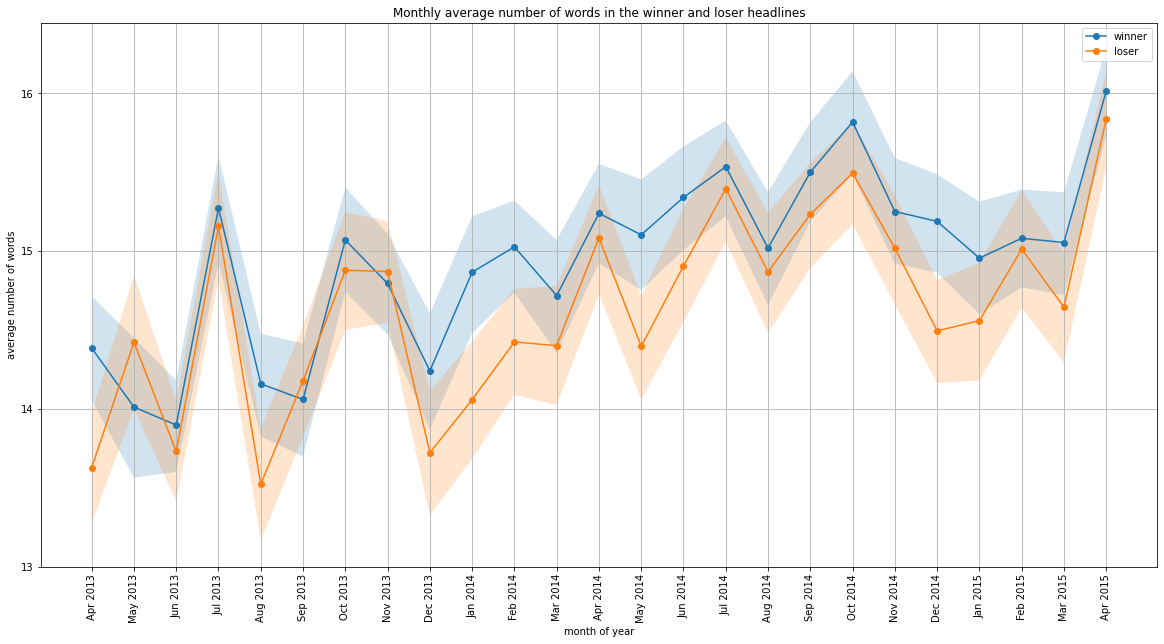

In [ ]:

# convert the date_created column to datetime
task_4_df['date_created'] = pd.to_datetime(task_4_df['date_created'])
# create a new column with the month of the date created
task_4_df['month'] = task_4_df['date_created'].dt.month
# create a new column with the year of the date created
task_4_df['year'] = task_4_df['date_created'].dt.year
# compute the monthly average number of words in the winner and loser headlines
monthly_avg_numwords = task_4_df.groupby(['year', 'month'])['numwords1', 'numwords2'].mean()
monthly_avg_numwords.reset_index(inplace=True)
# dictionnary that maps each month to its first 3 letters
month_to_abbrev = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}


# for each monthly average number of words in both the winner and the loser headlines we should compute one confidence interval
# we will use the bootstrap method on each month of each year separately

# create a function bootstrap_mean that computes the mean num of words for winner and loser headlines and the 95% confidence interval, given the month and the year
def bootstrap_mean_month_of_the_year(data, month, year, n_samples=5000):
    data = data[(data['month'] == month) & (data['year'] == year)]
    # create an empty list to store the means
    means_1 = []
    means_2 = []
    # run the simulation for n_samples times
    for i in range(n_samples):
        # sample with replacement from the data
        sample = data.sample(n=300, replace=True)
        # compute the mean and append it to the list
        means_1.append(sample['numwords1'].mean())
        means_2.append(sample['numwords2'].mean())
    # compute the average and the 95% confidence interval
    mean_1 = np.mean(means_1)
    lower_1 = np.percentile(means_1, 2.5)
    upper_1 = np.percentile(means_1, 97.5)
    mean_2 = np.mean(means_2)
    lower_2 = np.percentile(means_2, 2.5)
    upper_2 = np.percentile(means_2, 97.5)

    return [mean_1, lower_1, upper_1], [mean_2, lower_2, upper_2]

# for monthly_avg_numwords we should compute the confidence intervals for each month of each year
# create a new column with the confidence intervals for the winner headlines
monthly_avg_numwords['confidence_interval_1'] = monthly_avg_numwords.apply(lambda row: bootstrap_mean_month_of_the_year(task_4_df, row['month'], row['year'])[0], axis=1)
# create a new column with the confidence intervals for the loser headlines
monthly_avg_numwords['confidence_interval_2'] = monthly_avg_numwords.apply(lambda row: bootstrap_mean_month_of_the_year(task_4_df, row['month'], row['year'])[1], axis=1)

# On n'arrive pas a ameliorer ca pour pas faire deux fois les calculs ?

In [ ]:

plt.figure(figsize=(20, 10))
# plot the monthly average number of words in the winner headlines
plt.plot(monthly_avg_numwords.index, monthly_avg_numwords['numwords1'], label='winner', marker='o')
# plot the monthly average number of words in the loser headlines
plt.plot(monthly_avg_numwords.index, monthly_avg_numwords['numwords2'], label='loser', marker='o')
# plot the 95% confidence interval for the winner headlines
plt.fill_between(monthly_avg_numwords.index, monthly_avg_numwords['confidence_interval_1'].apply(lambda x: x[1]), monthly_avg_numwords['confidence_interval_1'].apply(lambda x: x[2]), alpha=0.2)
# plot the 95% confidence interval for the loser headlines
plt.fill_between(monthly_avg_numwords.index, monthly_avg_numwords['confidence_interval_2'].apply(lambda x: x[1]), monthly_avg_numwords['confidence_interval_2'].apply(lambda x: x[2]), alpha=0.2)
# on the x axis the month in text format (e.g. 'Jan 2013') is shown for all markers vertically
plt.xticks(monthly_avg_numwords.index, [month_to_abbrev[month] + ' ' + str(year) for year, month in zip(monthly_avg_numwords['year'], monthly_avg_numwords['month'])], rotation=90)
# show only integer values on the y axis
plt.yticks(np.arange(13, 17, 1))
# add title and labels
plt.title('Monthly average number of words in the winner and loser headlines')
plt.xlabel('month of year')
plt.ylabel('average number of words')
plt.grid()
plt.legend()

plt.show()



### T4.2

Produce similar plots to each pronoun category, as well as for positive and negative sentiment. Here, unlike in **T4.1**, depict the month averages pooled across winner and loser headlines (i.e., for each month, you calculate the average across both winners and loser headlines). Create all these plots in a single figure with no more than 11 inches of width and 11 inches of height. Again, consider only headlines created after April 2013 (the month of April inclusive).

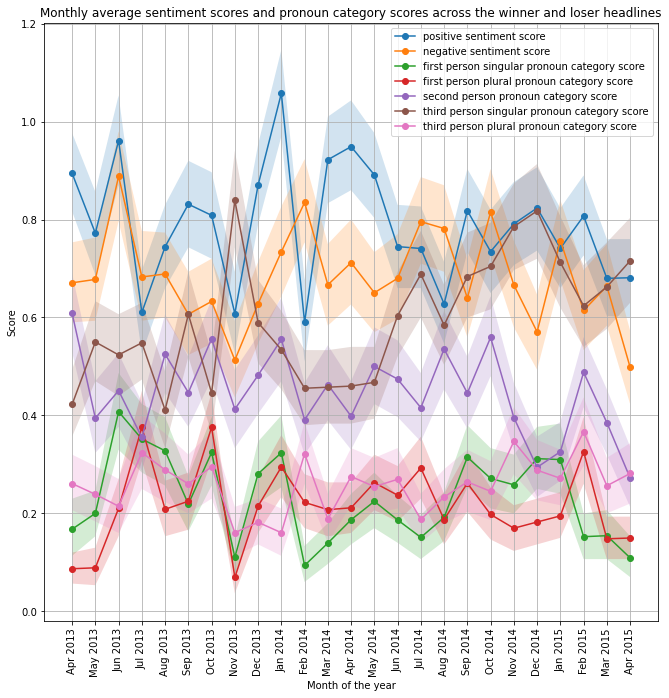

In [ ]:
# pooling dataframe: create a new dataframe that adds the winners and the losers columns to each other
# we take each coloumn containing numerical data from task_4_df that also contains '1' in its name and we add it to the corresponding column that contains '2' in its name
pooling_df = pd.DataFrame()
for col in task_4_df.columns:
    if '1' in col:
        pooling_df[col[:-1]] = task_4_df[col[:-1] + '2'] + task_4_df[col]

# take the mean over winner and loser values,
    pooling_df = pooling_df[['positive', 'negative', 'first_person_singular', 'first_person_plural', 'second_person',
                            'third_person_singular', 'third_person_plural', 'numwords']]/2"


# add date_created column to the pooling dataframe
pooling_df[['date_created','month','year']] = task_4_df[['date_created','month','year']]
# compute the monthly average positive sentiment, negative sentiment, pronoun categories scores for the winner and loser headlines
monthly_avg_scores = pooling_df.groupby(['year', 'month']).mean()
monthly_avg_scores.reset_index(inplace=True)

In [ ]:
# create a function bootstrap_mean that computes the mean scores for winner and loser headlines and the 95% confidence interval, given the month and the year
def bootstrap_mean_month_of_the_year(data, month, year, column_name, n_samples=5000):
    data = data[(data['month'] == month) & (data['year'] == year)]
    # create an empty list to store the means
    means = []
    # run the simulation for n_samples times
    for i in range(n_samples):
        # sample with replacement from the data
        sample = data.sample(n=300, replace=True)
        # compute the mean and append it to the list
        means.append(sample[column_name].mean())
    # compute the average and the 95% confidence interval
    mean = np.mean(means)
    lower = np.percentile(means, 2.5)
    upper = np.percentile(means, 97.5)

    return [mean, lower, upper]

# for monthly_avg_scores we should compute the confidence intervals for each month of each year
# create a new column with the confidence intervals for the positive sentiment
monthly_avg_scores['confidence_interval_positive'] = monthly_avg_scores.apply(lambda row: bootstrap_mean_month_of_the_year(pooling_df, row['month'], row['year'], 'positive'), axis=1)
# create a new column with the confidence intervals for the negative sentiment
monthly_avg_scores['confidence_interval_negative'] = monthly_avg_scores.apply(lambda row: bootstrap_mean_month_of_the_year(pooling_df, row['month'], row['year'], 'negative'), axis=1)
# create a new column with the confidence intervals for the first person singular pronoun category
monthly_avg_scores['confidence_interval_first_person_singular'] = monthly_avg_scores.apply(lambda row: bootstrap_mean_month_of_the_year(pooling_df, row['month'], row['year'], 'first_person_singular'), axis=1)
# create a new column with the confidence intervals for the first person plural pronoun category
monthly_avg_scores['confidence_interval_first_person_plural'] = monthly_avg_scores.apply(lambda row: bootstrap_mean_month_of_the_year(pooling_df, row['month'], row['year'], 'first_person_plural'), axis=1)
# create a new column with the confidence intervals for the second person pronoun category
monthly_avg_scores['confidence_interval_second_person'] = monthly_avg_scores.apply(lambda row: bootstrap_mean_month_of_the_year(pooling_df, row['month'], row['year'], 'second_person'), axis=1)
# create a new column with the confidence intervals for the third person singular pronoun category
monthly_avg_scores['confidence_interval_third_person_singular'] = monthly_avg_scores.apply(lambda row: bootstrap_mean_month_of_the_year(pooling_df, row['month'], row['year'], 'third_person_singular'), axis=1)
# create a new column with the confidence intervals for the third person plural pronoun category
monthly_avg_scores['confidence_interval_third_person_plural'] = monthly_avg_scores.apply(lambda row: bootstrap_mean_month_of_the_year(pooling_df, row['month'], row['year'], 'third_person_plural'), axis=1)


In [ ]:

# plot the monthly average positive sentiment scores across the winner and loser headlines
plt.figure(figsize=(11, 11))
plt.plot(monthly_avg_scores.index, monthly_avg_scores['positive'], label='positive sentiment score', marker='o')
# plot the monthly average negative sentiment scores across the winner and loser headlines
plt.plot(monthly_avg_scores.index, monthly_avg_scores['negative'], label='negative sentiment score', marker='o')
# plot the monthly average first person singular pronoun category scores across the winner and loser headlines
plt.plot(monthly_avg_scores.index, monthly_avg_scores['first_person_singular'], label='first person singular pronoun category score', marker='o')
# plot the monthly average first person plural pronoun category scores across the winner and loser headlines
plt.plot(monthly_avg_scores.index, monthly_avg_scores['first_person_plural'], label='first person plural pronoun category score', marker='o')
# plot the monthly average second person pronoun category scores across the winner and loser headlines
plt.plot(monthly_avg_scores.index, monthly_avg_scores['second_person'], label='second person pronoun category score', marker='o')
# plot the monthly average third person singular pronoun category scores across the winner and loser headlines
plt.plot(monthly_avg_scores.index, monthly_avg_scores['third_person_singular'], label='third person singular pronoun category score', marker='o')
# plot the monthly average third person plural pronoun category scores across the winner and loser headlines
plt.plot(monthly_avg_scores.index, monthly_avg_scores['third_person_plural'], label='third person plural pronoun category score', marker='o')

# plot the confidence intervals for the positive sentiment
plt.fill_between(monthly_avg_scores.index, monthly_avg_scores['confidence_interval_positive'].apply(lambda x: x[1]), monthly_avg_scores['confidence_interval_positive'].apply(lambda x: x[2]), alpha=0.2)
# plot the confidence intervals for the negative sentiment
plt.fill_between(monthly_avg_scores.index, monthly_avg_scores['confidence_interval_negative'].apply(lambda x: x[1]), monthly_avg_scores['confidence_interval_negative'].apply(lambda x: x[2]), alpha=0.2)
# plot the confidence intervals for the first person singular pronoun category
plt.fill_between(monthly_avg_scores.index, monthly_avg_scores['confidence_interval_first_person_singular'].apply(lambda x: x[1]), monthly_avg_scores['confidence_interval_first_person_singular'].apply(lambda x: x[2]), alpha=0.2)
# plot the confidence intervals for the first person plural pronoun category
plt.fill_between(monthly_avg_scores.index, monthly_avg_scores['confidence_interval_first_person_plural'].apply(lambda x: x[1]), monthly_avg_scores['confidence_interval_first_person_plural'].apply(lambda x: x[2]), alpha=0.2)
# plot the confidence intervals for the second person pronoun category
plt.fill_between(monthly_avg_scores.index, monthly_avg_scores['confidence_interval_second_person'].apply(lambda x: x[1]), monthly_avg_scores['confidence_interval_second_person'].apply(lambda x: x[2]), alpha=0.2)
# plot the confidence intervals for the third person singular pronoun category
plt.fill_between(monthly_avg_scores.index, monthly_avg_scores['confidence_interval_third_person_singular'].apply(lambda x: x[1]), monthly_avg_scores['confidence_interval_third_person_singular'].apply(lambda x: x[2]), alpha=0.2)
# plot the confidence intervals for the third person plural pronoun category
plt.fill_between(monthly_avg_scores.index, monthly_avg_scores['confidence_interval_third_person_plural'].apply(lambda x: x[1]), monthly_avg_scores['confidence_interval_third_person_plural'].apply(lambda x: x[2]), alpha=0.2)

# add a legend
plt.legend()

# add a title
plt.title('Monthly average sentiment scores and pronoun category scores across the winner and loser headlines')

# add a label to the x-axis
plt.xlabel('Month of the year')
# on the x axis the month in text format (e.g. 'Jan 2013') is shown for all markers vertically
plt.xticks(monthly_avg_scores.index, [month_to_abbrev[month] + ' ' + str(year) for year, month in zip(monthly_avg_scores['year'], monthly_avg_scores['month'])], rotation='vertical')

# add a label to the y-axis
plt.ylabel('Score')

# add a grid and show the plot
plt.grid()
plt.show()


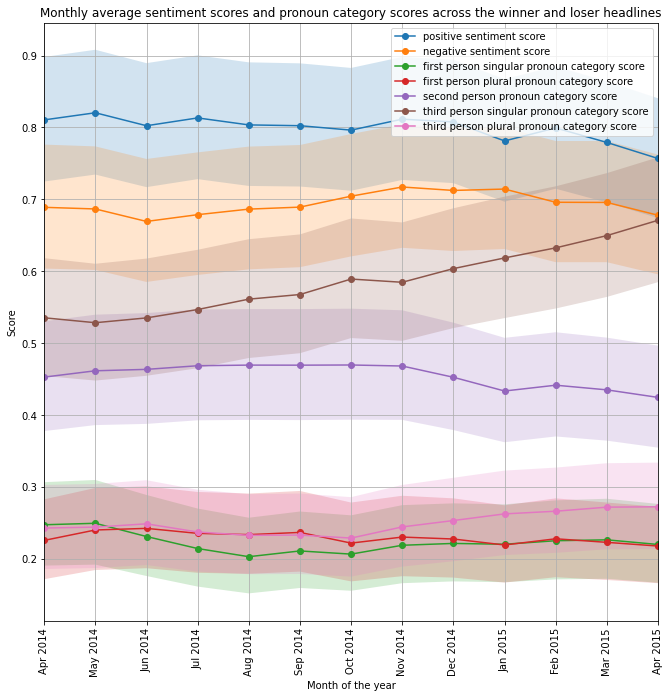

In [ ]:
# produce the same plot with smoothing to emphasize the trend
window_size = 12

plt.figure(figsize=(11, 11))
plt.plot(monthly_avg_scores.index, monthly_avg_scores['positive'].rolling(window=window_size).mean(), label='positive sentiment score', marker='o')
plt.plot(monthly_avg_scores.index, monthly_avg_scores['negative'].rolling(window=window_size).mean(), label='negative sentiment score', marker='o')
plt.plot(monthly_avg_scores.index, monthly_avg_scores['first_person_singular'].rolling(window=window_size).mean(), label='first person singular pronoun category score', marker='o')
plt.plot(monthly_avg_scores.index, monthly_avg_scores['first_person_plural'].rolling(window=window_size).mean(), label='first person plural pronoun category score', marker='o')
plt.plot(monthly_avg_scores.index, monthly_avg_scores['second_person'].rolling(window=window_size).mean(), label='second person pronoun category score', marker='o')
plt.plot(monthly_avg_scores.index, monthly_avg_scores['third_person_singular'].rolling(window=window_size).mean(), label='third person singular pronoun category score', marker='o')
plt.plot(monthly_avg_scores.index, monthly_avg_scores['third_person_plural'].rolling(window=window_size).mean(), label='third person plural pronoun category score', marker='o')
plt.fill_between(monthly_avg_scores.index, monthly_avg_scores['confidence_interval_positive'].apply(lambda x: x[1]).rolling(window=window_size).mean(), monthly_avg_scores['confidence_interval_positive'].apply(lambda x: x[2]).rolling(window=window_size).mean(), alpha=0.2)
plt.fill_between(monthly_avg_scores.index, monthly_avg_scores['confidence_interval_negative'].apply(lambda x: x[1]).rolling(window=window_size).mean(), monthly_avg_scores['confidence_interval_negative'].apply(lambda x: x[2]).rolling(window=window_size).mean(), alpha=0.2)
plt.fill_between(monthly_avg_scores.index, monthly_avg_scores['confidence_interval_first_person_singular'].apply(lambda x: x[1]).rolling(window=window_size).mean(), monthly_avg_scores['confidence_interval_first_person_singular'].apply(lambda x: x[2]).rolling(window=window_size).mean(), alpha=0.2)
plt.fill_between(monthly_avg_scores.index, monthly_avg_scores['confidence_interval_first_person_plural'].apply(lambda x: x[1]).rolling(window=window_size).mean(), monthly_avg_scores['confidence_interval_first_person_plural'].apply(lambda x: x[2]).rolling(window=window_size).mean(), alpha=0.2)
plt.fill_between(monthly_avg_scores.index, monthly_avg_scores['confidence_interval_second_person'].apply(lambda x: x[1]).rolling(window=window_size).mean(), monthly_avg_scores['confidence_interval_second_person'].apply(lambda x: x[2]).rolling(window=window_size).mean(), alpha=0.2)
plt.fill_between(monthly_avg_scores.index, monthly_avg_scores['confidence_interval_third_person_singular'].apply(lambda x: x[1]).rolling(window=window_size).mean(), monthly_avg_scores['confidence_interval_third_person_singular'].apply(lambda x: x[2]).rolling(window=window_size).mean(), alpha=0.2)
plt.fill_between(monthly_avg_scores.index, monthly_avg_scores['confidence_interval_third_person_plural'].apply(lambda x: x[1]).rolling(window=window_size).mean(), monthly_avg_scores['confidence_interval_third_person_plural'].apply(lambda x: x[2]).rolling(window=window_size).mean(), alpha=0.2)

plt.legend()
plt.title('Monthly average sentiment scores and pronoun category scores across the winner and loser headlines')
plt.xticks(monthly_avg_scores.index, [month_to_abbrev[month] + ' ' + str(year) for year, month in zip(monthly_avg_scores['year'], monthly_avg_scores['month'])], rotation='vertical')
plt.xlim(monthly_avg_scores.index[0] + window_size, monthly_avg_scores.index[-1])
plt.xlabel('Month of the year')
plt.ylabel('Score')
plt.grid()
plt.show()



### T4.3

**Discuss:** Has the type of headline Upworthy used in their A/B tests changed with time? Are these changes likely to be producing more or less engaging headlines? Justify.

insights from the plots:
- A lot of the scores show a relatively idle trend overtime.
- The second person pronoun score shows declining trend since october 2014.
- The third person singular pronoun score shows a clear increasing trend since may 2014.

--> The type of headline Upworthy used in their A/B tests changed in some aspects overtime. The changes are likely to be producing more engaging headlines(see T3.9 to justify).


### T4.4 

Divide your data into two periods, $t_1$, which goes from  April 2013 (inclusive) to March 2014 (inclusive), and $t_2$, which goes from April 2014 (inclusive) to the latest A/B test in the data. Create a dataframe for A/B tests in each period. 

In [ ]:
# t1_dataframe: from april 2013 inclusive to march 2014 exclusive
# t2_dataframe: from april 2014 inclusive to the end of the dataset

t1_dataframe = task_4_df[(task_4_df['date_created'] < '2014-04-01') & (task_4_df['date_created'] >= '2013-04-01')]
t2_dataframe = task_4_df[task_4_df['date_created'] >= '2014-04-01']

# sanity check: the length of the two dataframes should be equal to the length of the original dataframe
assert len(t1_dataframe) + len(t2_dataframe) == len(task_4_df)

### T4.5 

Let's examine if the effects observed remained the same throughout the study period. Use an appropriate methodology  of your choice to determine if the effects observed in **T3.8** (length, each category of pronouns, positive words, and negative words) were different in $t_1$ and $t_2$. Here, note that we are considering "at least one positive outcome" to be the manifestation of an underlying effect, thus significance level must be adjusted down when performing multiple hypothesis tests!

In [ ]:
 # Separately for winner and loser headlines, we perform 8 t-test corresponding to each feature (length, p/n words, pronouns)
 # # Total : 16 tests
features = ['positive','negative','first_person_singular', 'first_person_plural','second_person',
                'third_person_singular', 'third_person_plural', 'numwords']
pvalues_winner = []
pvalues_loser = []
for ft in features:
    pvalues_winner.append(stats.ttest_ind(t1_dataframe[ft+'1'],t2_dataframe[ft+'1']).pvalue)
    pvalues_loser.append(stats.ttest_ind(t1_dataframe[ft+'2'],t2_dataframe[ft+'2']).pvalue)

In [ ]:
# Correcting the pvalues to assess the global null hypothesis = all samples are similar
# Bonferroni's method
alpha_los = 0.05/len(pvalues_loser)
alpha_win = 0.05/len(pvalues_winner)
alpha_tot = 0.05/(len(pvalues_winner)+len(pvalues_winner))

print("For loser headlines : the global pvalue is {} and alpha equals {}.".format(min(pvalues_loser),alpha_los))
print('The global null hypothesis is rejected')

print("For winner headlines : the global pvalue is {} and alpha equals {}.".format(min(pvalues_winner),alpha_win))
print('The global null hypothesis is rejected')

print("For both winner and loser headlines : the global pvalue is {} and alpha equals {}.".format(min(min(pvalues_winner,pvalues_loser)),alpha_tot))
print('The global null hypothesis is rejected')

print('There is a statistically significant evolution between t1 and t2')"

### T4.6

**Discuss:** Hypothesize two reasons that could have led to a change in the observed effects. According to the analysis done in **T4.5**, have the effects observed remained the same across the study period?

### T4.7

The features we are studying may interact with each other. For instance, people may like first person singular pronouns in headlines containing positive words (you are amazing!), but dislike headlines with negative words and first person pronouns (you are awful!). To help answer this question, create:
- a dataframe containing all A/B tests where both winner and loser headlines include a positive word; and
- a dataframe containing all A/B tests where both winner and loser headlines include a negative word;


In [ ]:
df_positive = task_4_df[(task_4_df['positive1'] == 1) & (task_4_df['positive2'] == 1)]
df_negative = task_4_df[(task_4_df['negative1'] == 1) & (task_4_df['negative2'] == 1)]

### T4.8

Using an appropriate methodology of your choice, determine if the effect of the use of first person singular pronouns in the headline is heterogeneous across headlines with positive words and negative words, i.e., is the effect significantly stronger for one of the dataframes created in **T4.7**?

In [ ]:
stats.ttest_ind(df_positive['first_person_singular1'],df_negative['first_person_singular1'])
stats.ttest_ind(df_positive['first_person_singular2'],df_negative['first_person_singular2'])

### T4.9 

**Discuss:** Considering the analyses you did throughout Tasks 3 and 4, write a short text (no more than 250 words) giving advice to Upworthy employees on how they should try to write engaging headlines. You can reference images present in the notebook by indicating a task (e.g., image plotted in **T3.3**) or a cell number. Note that you do not need to conduct any additional analysis to write this text.